In [23]:
import warnings 
warnings.filterwarnings('ignore')

In [24]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [25]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

train_path = 'Dataset/train'
test_path = 'Dataset/train'

In [26]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1157 images belonging to 2 classes.
Found 1157 images belonging to 2 classes.


# **FOR VGG16**

In [28]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
x1= Flatten()(vgg16.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = vgg16.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [30]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/2
37/37 [==============================] - ETA: 0s - loss: 0.5621 - accuracy: 0.71 - ETA: 1:15 - loss: 0.5533 - accuracy: 0.68 - ETA: 1:38 - loss: 46.6714 - accuracy: 0.697 - ETA: 1:47 - loss: 35.1277 - accuracy: 0.726 - ETA: 1:50 - loss: 28.2273 - accuracy: 0.725 - ETA: 1:51 - loss: 23.6363 - accuracy: 0.687 - ETA: 1:50 - loss: 20.3249 - accuracy: 0.714 - ETA: 1:49 - loss: 17.8501 - accuracy: 0.722 - ETA: 1:46 - loss: 15.9101 - accuracy: 0.739 - ETA: 1:44 - loss: 14.3577 - accuracy: 0.753 - ETA: 1:41 - loss: 13.1175 - accuracy: 0.750 - ETA: 1:39 - loss: 12.0756 - accuracy: 0.747 - ETA: 1:35 - loss: 11.2139 - accuracy: 0.704 - ETA: 1:32 - loss: 10.4581 - accuracy: 0.703 - ETA: 1:28 - loss: 9.7935 - accuracy: 0.710 - ETA: 1:25 - loss: 9.2115 - accuracy: 0.71 - ETA: 1:21 - loss: 8.7040 - accuracy: 0.71 - ETA: 1:17 - loss: 8.2595 - accuracy: 0.71 - ETA: 1:14 - loss: 7.8555 - accuracy: 0.71 - ETA: 1:10 - loss: 7.4933 - accuracy: 0.71 - ETA: 1:06 - loss: 7.1663 - accuracy: 0.71 - ET

In [31]:
val1 = r1.history['val_accuracy']

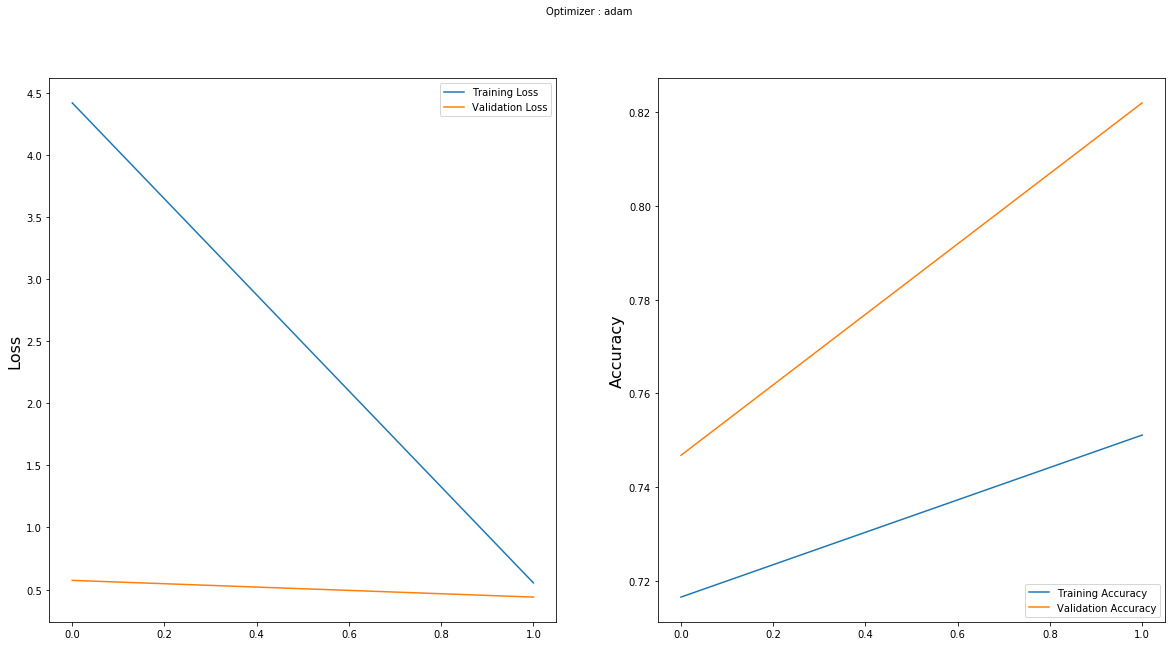

In [32]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **DenseNet121**

In [51]:
from tensorflow.keras.applications import DenseNet121,ResNet101V2

In [52]:
des121=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [53]:
x1= Flatten()(des121.output)
prediction1 = Dense(2, activation='softmax')(x1)
model1 = Model(inputs = des121.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

conv3_block4_1_conv (Conv2D)    (None, 16, 16, 128)  28672       conv3_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, 16, 16, 128)  512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, 16, 16, 128)  0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, 16, 16, 32)   36864       conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_concat (Concatenat (None, 16, 16, 256)  0           conv3_block3_concat[0][0]        
                                                                 conv3_block4_2_conv[0][0]        
__________

conv4_block2_2_conv (Conv2D)    (None, 8, 8, 32)     36864       conv4_block2_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block2_concat (Concatenat (None, 8, 8, 320)    0           conv4_block1_concat[0][0]        
                                                                 conv4_block2_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_bn (BatchNormali (None, 8, 8, 320)    1280        conv4_block2_concat[0][0]        
__________________________________________________________________________________________________
conv4_block3_0_relu (Activation (None, 8, 8, 320)    0           conv4_block3_0_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, 8, 8, 128)    40960       conv4_block3_0_relu[0][0]        
__________

__________________________________________________________________________________________________
conv4_block13_2_conv (Conv2D)   (None, 8, 8, 32)     36864       conv4_block13_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block13_concat (Concatena (None, 8, 8, 672)    0           conv4_block12_concat[0][0]       
                                                                 conv4_block13_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_bn (BatchNormal (None, 8, 8, 672)    2688        conv4_block13_concat[0][0]       
__________________________________________________________________________________________________
conv4_block14_0_relu (Activatio (None, 8, 8, 672)    0           conv4_block14_0_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

conv4_block24_1_relu (Activatio (None, 8, 8, 128)    0           conv4_block24_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block24_2_conv (Conv2D)   (None, 8, 8, 32)     36864       conv4_block24_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block24_concat (Concatena (None, 8, 8, 1024)   0           conv4_block23_concat[0][0]       
                                                                 conv4_block24_2_conv[0][0]       
__________________________________________________________________________________________________
pool4_bn (BatchNormalization)   (None, 8, 8, 1024)   4096        conv4_block24_concat[0][0]       
__________________________________________________________________________________________________
pool4_relu (Activation)         (None, 8, 8, 1024)   0           pool4_bn[0][0]                   
__________

__________________________________________________________________________________________________
conv5_block11_0_bn (BatchNormal (None, 4, 4, 832)    3328        conv5_block10_concat[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_relu (Activatio (None, 4, 4, 832)    0           conv5_block11_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_1_conv (Conv2D)   (None, 4, 4, 128)    106496      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, 4, 4, 128)    512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, 4, 4, 128)    0           conv5_block11_1_bn[0][0]         
__________

In [54]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/2
37/37 [==============================] - ETA: 0s - loss: 1.0780 - accuracy: 0.53 - ETA: 1:15 - loss: 3.4040 - accuracy: 0.59 - ETA: 57s - loss: 3.2192 - accuracy: 0.6087 - ETA: 1:12 - loss: 2.2622 - accuracy: 0.70 - ETA: 1:20 - loss: 1.8668 - accuracy: 0.74 - ETA: 1:25 - loss: 1.6184 - accuracy: 0.77 - ETA: 1:26 - loss: 1.4069 - accuracy: 0.79 - ETA: 1:27 - loss: 1.2755 - accuracy: 0.80 - ETA: 1:26 - loss: 1.1280 - accuracy: 0.82 - ETA: 1:25 - loss: 1.0391 - accuracy: 0.83 - ETA: 1:23 - loss: 0.9540 - accuracy: 0.84 - ETA: 1:21 - loss: 0.8803 - accuracy: 0.85 - ETA: 1:19 - loss: 0.8190 - accuracy: 0.86 - ETA: 1:17 - loss: 0.7960 - accuracy: 0.86 - ETA: 1:14 - loss: 0.8694 - accuracy: 0.85 - ETA: 1:11 - loss: 0.8563 - accuracy: 0.86 - ETA: 1:08 - loss: 0.8176 - accuracy: 0.86 - ETA: 1:05 - loss: 0.7783 - accuracy: 0.87 - ETA: 1:02 - loss: 0.7668 - accuracy: 0.86 - ETA: 59s - loss: 0.7446 - accuracy: 0.8695 - ETA: 56s - loss: 0.7226 - accuracy: 0.872 - ETA: 52s - loss: 0.7523 -

In [55]:
val2 = r1.history['val_accuracy']

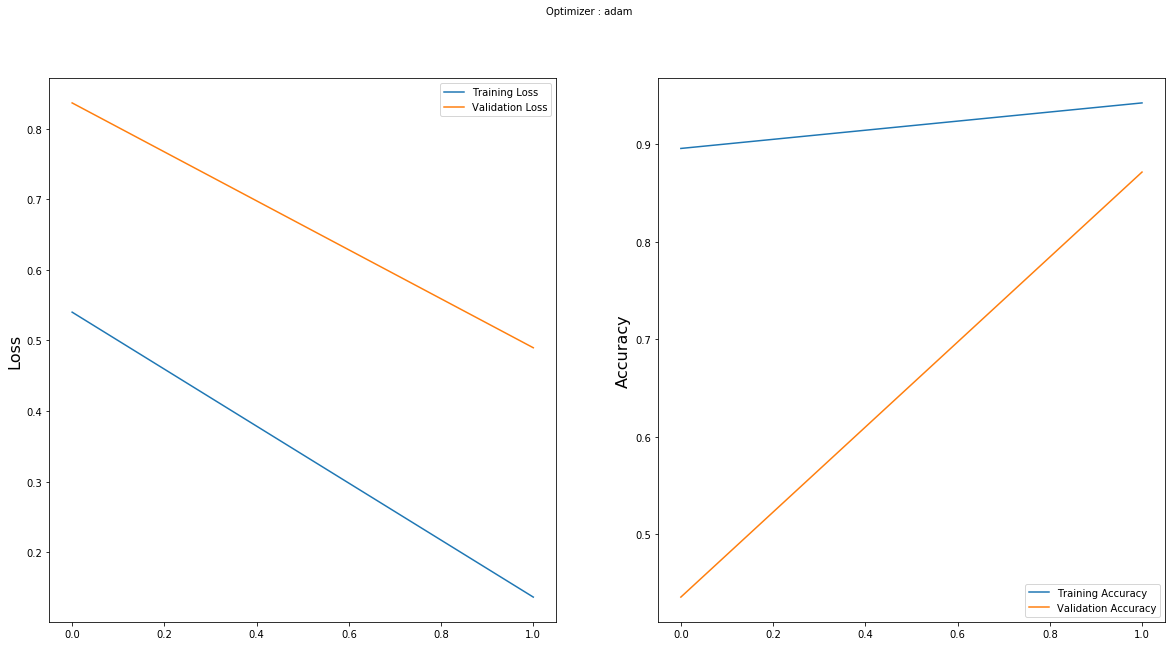

In [56]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [61]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(2))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 256)       1024      
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 256)      

In [62]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [63]:
r1 = AlexNet.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/2
37/37 [==============================] - ETA: 0s - loss: 1.0385 - accuracy: 0.46 - ETA: 11s - loss: 0.8522 - accuracy: 0.546 - ETA: 14s - loss: 0.9255 - accuracy: 0.531 - ETA: 15s - loss: 0.8574 - accuracy: 0.562 - ETA: 16s - loss: 0.8058 - accuracy: 0.581 - ETA: 16s - loss: 0.7926 - accuracy: 0.583 - ETA: 16s - loss: 0.7699 - accuracy: 0.593 - ETA: 15s - loss: 0.7326 - accuracy: 0.617 - ETA: 15s - loss: 0.7252 - accuracy: 0.628 - ETA: 14s - loss: 0.7304 - accuracy: 0.628 - ETA: 14s - loss: 0.7201 - accuracy: 0.640 - ETA: 13s - loss: 0.7161 - accuracy: 0.641 - ETA: 13s - loss: 0.7083 - accuracy: 0.645 - ETA: 12s - loss: 0.6938 - accuracy: 0.660 - ETA: 12s - loss: 0.6923 - accuracy: 0.662 - ETA: 11s - loss: 0.6921 - accuracy: 0.663 - ETA: 11s - loss: 0.6733 - accuracy: 0.680 - ETA: 10s - loss: 0.6612 - accuracy: 0.692 - ETA: 10s - loss: 0.6481 - accuracy: 0.698 - ETA: 9s - loss: 0.6371 - accuracy: 0.708 - ETA: 9s - loss: 0.6321 - accuracy: 0.71 - ETA: 8s - loss: 0.6277 - accur

In [64]:
val3 = r1.history['val_accuracy']

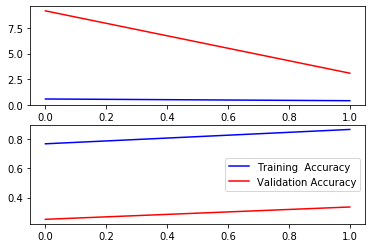

In [65]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

# Xception

In [68]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

# Defining batch and epoch sizes
batch_size = 100
epochs = 20

# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(2, activation='softmax')(x)
# Combining base and head 
model3 = Model(inputs=base.input, outputs=head)

# Compiling the model
model3.compile(optimizer=Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

# Fitting the model with train and validation augmented datasets.
history = model3.fit(train_set,
                              epochs = 5,
                              validation_data = test_set)

Epoch 1/5
37/37 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.65 - ETA: 1:12 - loss: 0.6544 - accuracy: 0.70 - ETA: 1:33 - loss: 0.6366 - accuracy: 0.69 - ETA: 1:41 - loss: 0.6216 - accuracy: 0.71 - ETA: 1:44 - loss: 0.6188 - accuracy: 0.73 - ETA: 1:44 - loss: 0.6018 - accuracy: 0.76 - ETA: 1:42 - loss: 0.5943 - accuracy: 0.77 - ETA: 1:41 - loss: 0.5750 - accuracy: 0.78 - ETA: 1:38 - loss: 0.5576 - accuracy: 0.80 - ETA: 1:36 - loss: 0.5367 - accuracy: 0.82 - ETA: 1:33 - loss: 0.5271 - accuracy: 0.82 - ETA: 1:30 - loss: 0.5162 - accuracy: 0.83 - ETA: 1:28 - loss: 0.5052 - accuracy: 0.84 - ETA: 1:24 - loss: 0.4949 - accuracy: 0.85 - ETA: 1:21 - loss: 0.4836 - accuracy: 0.85 - ETA: 1:17 - loss: 0.4704 - accuracy: 0.86 - ETA: 1:14 - loss: 0.4588 - accuracy: 0.87 - ETA: 1:10 - loss: 0.4466 - accuracy: 0.87 - ETA: 1:06 - loss: 0.4337 - accuracy: 0.88 - ETA: 1:03 - loss: 0.4339 - accuracy: 0.88 - ETA: 59s - loss: 0.4231 - accuracy: 0.8899 - ETA: 56s - loss: 0.4145 - 

In [69]:
val4 = history.history['val_accuracy']

In [70]:
model3.save('xce.h5')

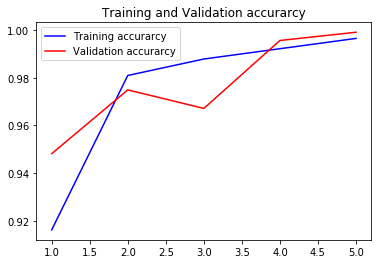

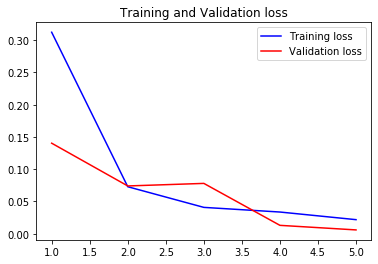

In [71]:
import matplotlib.pyplot as plt
#get the details form the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# ZFNet

In [72]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [299,299]

train_path = 'Dataset/train'
test_path = 'Dataset/train'

In [73]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [74]:
train_set1 = train_datagen.flow_from_directory(train_path,
                                              target_size=(299,299),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set1 = test_datagen.flow_from_directory(test_path,
                                            target_size=(299,299),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1157 images belonging to 2 classes.
Found 1157 images belonging to 2 classes.


In [75]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    
		tf.keras.layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu',
			input_shape=(299,299, 3)),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),

		tf.keras.layers.MaxPooling2D(3, strides=2),

    tf.keras.layers.Flatten(),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(2, activation='softmax')
	])


In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 147, 147, 96)      14208     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 96)        0         
_________________________________________________________________
lambda (Lambda)              (None, 73, 73, 96)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 35, 35, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 384)      

In [77]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), \
              loss='categorical_crossentropy', \
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])

In [78]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=1,min_lr=0.00001)

In [79]:
his = model.fit_generator(train_set1, validation_data=test_set1, epochs=2)

Epoch 1/2
37/37 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.6250 - top_k_categorical_accuracy: 1.000 - ETA: 36s - loss: 1.9222 - accuracy: 0.7500 - top_k_categorical_accuracy: 1.00 - ETA: 46s - loss: 1.4890 - accuracy: 0.7292 - top_k_categorical_accuracy: 1.00 - ETA: 50s - loss: 1.8313 - accuracy: 0.6172 - top_k_categorical_accuracy: 1.00 - ETA: 51s - loss: 2.4786 - accuracy: 0.6250 - top_k_categorical_accuracy: 1.00 - ETA: 52s - loss: 2.8327 - accuracy: 0.5625 - top_k_categorical_accuracy: 1.00 - ETA: 52s - loss: 23.5461 - accuracy: 0.5893 - top_k_categorical_accuracy: 1.000 - ETA: 51s - loss: 20.9169 - accuracy: 0.5430 - top_k_categorical_accuracy: 1.000 - ETA: 50s - loss: 28.5438 - accuracy: 0.5590 - top_k_categorical_accuracy: 1.000 - ETA: 49s - loss: 42.3697 - accuracy: 0.5219 - top_k_categorical_accuracy: 1.000 - ETA: 48s - loss: 6590.5059 - accuracy: 0.5426 - top_k_categorical_accuracy: 1.000 - ETA: 46s - loss: 190956393463808.0000 - accuracy: 0.5234 

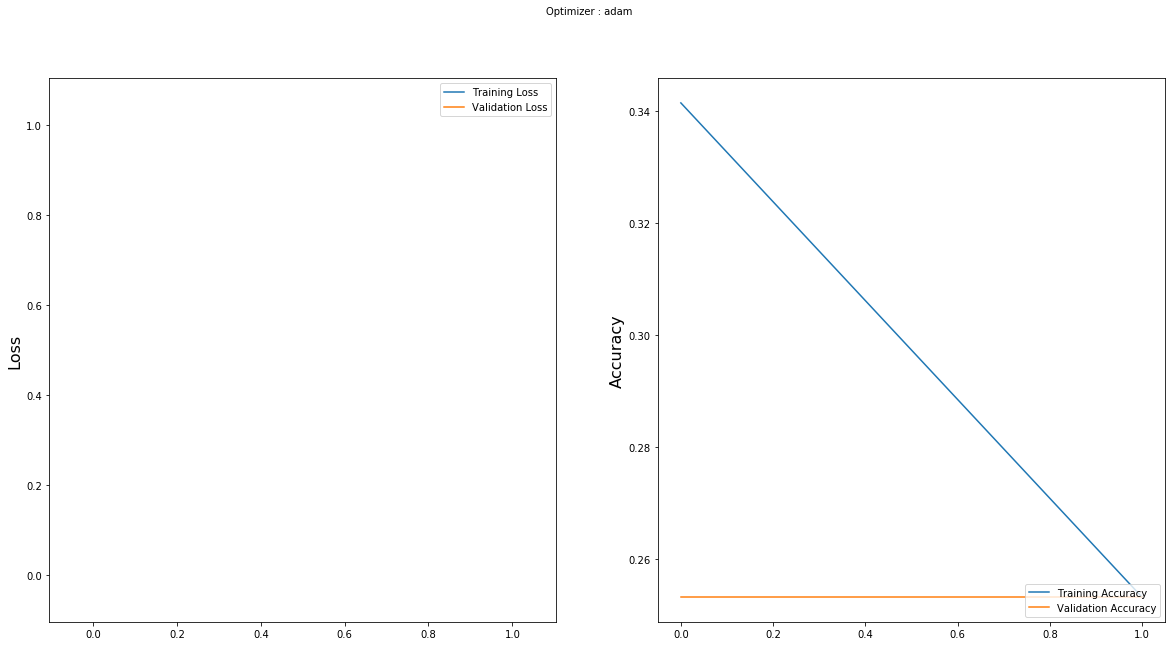

In [80]:
import matplotlib.pyplot as plt

x= his
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [81]:
val5 = history.history['val_accuracy']

For CNN

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [83]:
# The images are in a folder named 'input/natural-images/natural_images'
train_dataset_path = 'Dataset/train'

In [84]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [85]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 1157 images belonging to 2 classes.


In [86]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(train_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 1157 images belonging to 2 classes.


In [87]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Normal
1 : Pothole


In [92]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=2, activation='softmax')
    ])
    
    return model

In [93]:
cnn_model = create_model()
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 146, 146, 128)     9728      
_________________________________________________________________
activation_21 (Activation)   (None, 146, 146, 128)     0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 128)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 73, 73, 128)       512       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 71, 71, 64)        73792     
_________________________________________________________________
activation_22 (Activation)   (None, 71, 71, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 35, 35, 64)       

In [94]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [95]:
history = cnn_model.fit(train_generator, epochs=2, validation_data=train_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/2
37/37 - 57s - loss: 1.4344 - accuracy: 0.7632 - val_loss: 1.1766 - val_accuracy: 0.7476
Epoch 2/2
37/37 - 57s - loss: 0.9786 - accuracy: 0.8220 - val_loss: 2.0449 - val_accuracy: 0.7476


In [96]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

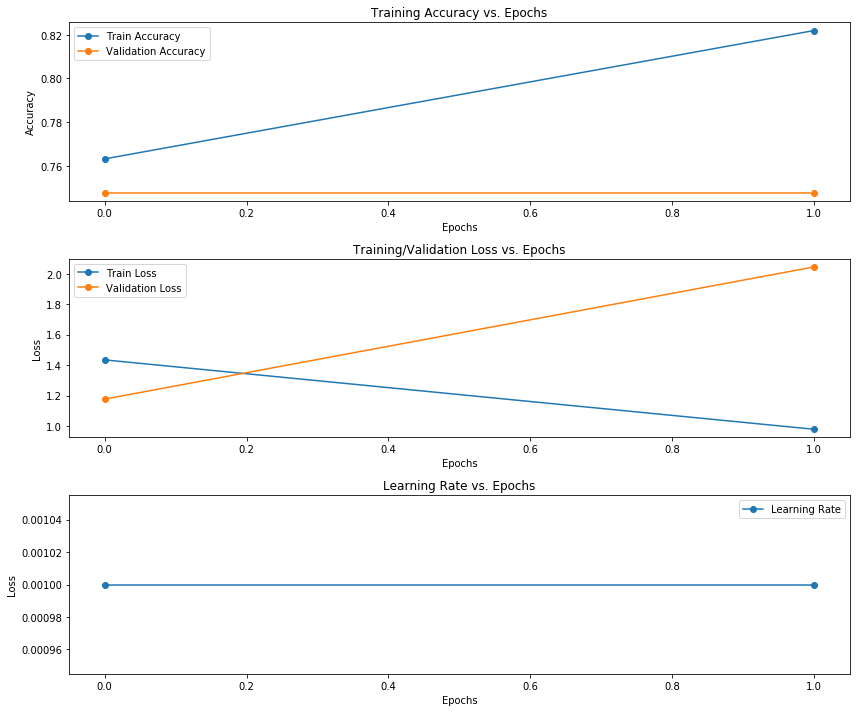

In [97]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [98]:
val6 = val_accuracy

For PolyNet

In [9]:
import os  
import glob
import sklearn
from sklearn.model_selection import train_test_split

import PIL 
import numpy as np
import matplotlib.pyplot as plt 

import torch
import torch.nn as nn
from torchinfo import summary 

import torch.optim as optim
from IPython.display import Image
from torch.utils.data import DataLoader, Dataset

from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

import cv2

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

device(type='cpu')

In [11]:
random_seed = 124
np.random.seed(random_seed)

torch.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True

In [12]:
path = 'Dataset/train/'

pos_files = glob.glob(os.path.join(path, "Normal",'*.*'))
neg_files = glob.glob(os.path.join(path, 'Pothole','*.*'))

images = pos_files + neg_files
labels = np.array([1]*len(pos_files)+[0]*len(neg_files))

images_tv, images_test, y_tv, y_test  = train_test_split(images, labels, shuffle=True, test_size=0.2, random_state=123)
images_train, images_val, y_train, y_val  = train_test_split(images_tv, y_tv, shuffle=True, test_size=0.25, random_state=123)

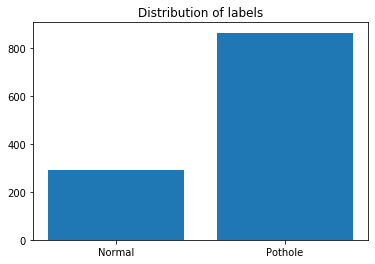

In [13]:
num_pos, num_neg = len(pos_files), len(neg_files)

plt.title('Distribution of labels')
plt.bar(['Normal', 'Pothole'], [num_pos, num_neg])
plt.show()

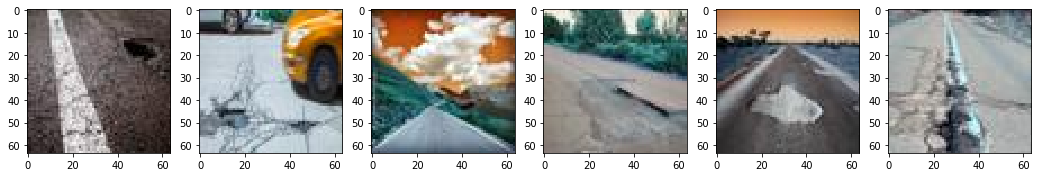

In [14]:
im = [cv2.imread(images_train[i]) for i in range(6)]

fig,ax = plt.subplots(ncols=6, figsize=(18,6))
for i in range(len(im)):
    ax[i].imshow(im[i],cmap='gray')

plt.show()

In [15]:
print(f'Number of samples in each set (train, val, test): {len(y_train), len(y_val), len(y_test)}')

print(f'Number of positive samples in each set: {y_train.sum(), y_val.sum(), y_test.sum()}')

Number of samples in each set (train, val, test): (693, 232, 232)
Number of positive samples in each set: (176, 55, 62)


In [16]:
class CT_Dataset(Dataset):
    def __init__(self, img_path, img_labels, img_transforms=None, grayscale=True):
        self.img_path = img_path
        self.img_labels = torch.Tensor(img_labels)
        if (img_transforms is None) & (grayscale == True):
            self.transforms = transforms.Compose([transforms.Grayscale(),
                                                  transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        elif grayscale == False:
            self.transforms = transforms.Compose([transforms.Resize((250, 250)),
                                                  transforms.ToTensor()])
        else:
            self.transforms = img_transforms
    
    def __getitem__(self, index):
        # load image
        cur_path = self.img_path[index]
        cur_img = PIL.Image.open(cur_path).convert('RGB')
        cur_img = self.transforms(cur_img)

        return cur_img, self.img_labels[index]
    
    def __len__(self):
        return len(self.img_path)

In [17]:
class Polynet(nn.Module):
    
    def __init__(self, dropout=0.5):
        super(Polynet, self).__init__()
        self.convnet = nn.Sequential(
          # input (num_batch, 1, 250, 250)
          nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3),  # (num_batch, 64, 248, 248)
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),  # (num_batch, 64, 124, 124)

          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3), # (num_batch, 128, 122, 122)
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),  # (num_batch, 128, 61, 61)

          nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3), # (num_batch, 256, 59, 59)
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),  # (num_batch, 256, 29, 29)

          nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3), # (num_batch, 128, 27, 27)
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),  # (num_batch, 128, 13, 13)

          nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3), # (num_batch, 64, 11, 11)
          nn.BatchNorm2d(512),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2),  # (num_batch, 64, 5, 5)
          nn.Flatten() # (num_batch, 1600)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),  # Dropout before first linear layer since it has a large number of trainable parameters
            nn.Linear(in_features= 12800, out_features=512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        x = self.convnet(x)
        x = self.classifier(x)
        return x

In [18]:
vision_model = Polynet()
summary(vision_model, (32, 1, 250, 250))

Layer (type:depth-idx)                   Output Shape              Param #
Polynet                                  [32, 1]                   --
├─Sequential: 1-1                        [32, 12800]               --
│    └─Conv2d: 2-1                       [32, 64, 248, 248]        640
│    └─BatchNorm2d: 2-2                  [32, 64, 248, 248]        128
│    └─ReLU: 2-3                         [32, 64, 248, 248]        --
│    └─MaxPool2d: 2-4                    [32, 64, 124, 124]        --
│    └─Conv2d: 2-5                       [32, 128, 122, 122]       73,856
│    └─BatchNorm2d: 2-6                  [32, 128, 122, 122]       256
│    └─ReLU: 2-7                         [32, 128, 122, 122]       --
│    └─MaxPool2d: 2-8                    [32, 128, 61, 61]         --
│    └─Conv2d: 2-9                       [32, 256, 59, 59]         295,168
│    └─BatchNorm2d: 2-10                 [32, 256, 59, 59]         512
│    └─ReLU: 2-11                        [32, 256, 59, 59]         --
│ 

In [19]:
def train_model(model, train_dataset, val_dataset, test_dataset, device, 
                lr=0.0001, epochs=30, batch_size=32, l2=0.00001, gamma=0.5,
                patience=7):
    model = model.to(device)

    # construct dataloader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    # history
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    # set up loss function and optimizer
    criterion = nn.BCEWithLogitsLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)  # pass in the parameters to be updated and learning rate
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=patience, gamma=gamma)

    # Training Loop
    print("Training Start:")
    for epoch in range(epochs):
        model.train()  # start to train the model, activate training behavior

        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        for i, (images, labels) in enumerate(train_loader):
            # reshape images
            images = images.to(device)  # reshape: from (128, 1, 28, 28) -> (128, 28 * 28) = (128, 284), move batch to device
            labels = labels.to(device)  # move to device
            # forward
            outputs = model(images).view(-1)  # forward
            pred = torch.sigmoid(outputs)
            pred = torch.round(pred)
    
            cur_train_loss = criterion(outputs, labels)  # loss
            cur_train_acc = (pred == labels).sum().item() / batch_size

            # backward
            cur_train_loss.backward()   # run back propagation
            optimizer.step()            # optimizer update all model parameters
            optimizer.zero_grad()       # set gradient to zero, avoid gradient accumulating

            # loss
            train_loss += cur_train_loss 
            train_acc += cur_train_acc
        
        # valid
        model.eval()  # start to train the model, activate training behavior
        with torch.no_grad():  # tell pytorch not to update parameters
            for images, labels in val_loader:
                # calculate validation loss
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images).view(-1)

                # loss
                cur_valid_loss = criterion(outputs, labels)
                val_loss += cur_valid_loss
                # acc
                pred = torch.sigmoid(outputs)
                pred = torch.round(pred)
                val_acc += (pred == labels).sum().item() / batch_size

        # learning schedule step
        scheduler.step()

        # print training feedback
        train_loss = train_loss / len(train_loader)
        train_acc = train_acc / len(train_loader)
        val_loss = val_loss / len(val_loader)
        val_acc = val_acc / len(val_loader)

        print(f"Epoch:{epoch + 1} / {epochs}, lr: {optimizer.param_groups[0]['lr']:.5f} train loss:{train_loss:.5f}, train acc: {train_acc:.5f}, valid loss:{val_loss:.5f}, valid acc:{val_acc:.5f}")
    
        # update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
    
    test_acc = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # calculate outputs by running images through the network
            outputs = model(images)

            # the class with the highest energy is what we choose as prediction
            pred = torch.sigmoid(outputs)
            pred = torch.round(pred)
            test_acc += (pred == labels).sum().item()

    print(f'Test Accuracy:  {(test_acc / len(test_loader))}')

    return history

In [20]:
# Load the data
train_dataset = CT_Dataset(img_path=images_train, img_labels=y_train)
val_dataset = CT_Dataset(img_path=images_val, img_labels=y_val)
test_dataset = CT_Dataset(img_path=images_test, img_labels=y_test)

In [21]:
# Train the CNN model
model = Polynet(dropout=0.5)
hist = train_model(model, train_dataset, val_dataset, test_dataset, device, lr=0.0002, batch_size=32, epochs=5, l2=0.09, patience=5)

Training Start:
Epoch:1 / 5, lr: 0.00020 train loss:0.51110, train acc: 0.73295, valid loss:0.63043, valid acc:0.69141
Epoch:2 / 5, lr: 0.00020 train loss:0.41306, train acc: 0.78551, valid loss:0.60030, valid acc:0.70312
Epoch:3 / 5, lr: 0.00020 train loss:0.38501, train acc: 0.80966, valid loss:0.53885, valid acc:0.66406
Epoch:4 / 5, lr: 0.00020 train loss:0.38188, train acc: 0.82244, valid loss:0.49025, valid acc:0.70312
Epoch:5 / 5, lr: 0.00010 train loss:0.33995, train acc: 0.83381, valid loss:0.43657, valid acc:0.71484
Test Accuracy:  0.7672413793103449


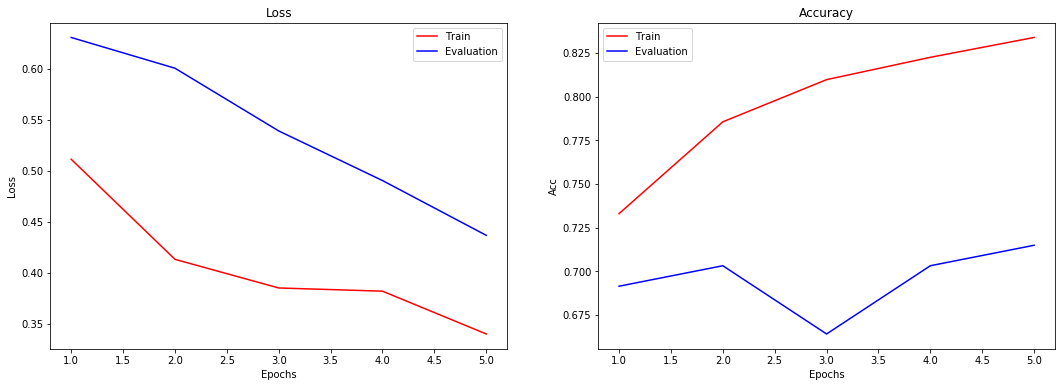

In [22]:
# plot training curves
epochs = range(1, len(hist['train_loss']) + 1)

fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].plot(epochs, hist['train_loss'], 'r-', label='Train')
ax[0].plot(epochs, hist['val_loss'], 'b-', label='Evaluation')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs, hist['train_acc'], 'r-', label='Train')
ax[1].plot(epochs, hist['val_acc'], 'b-', label='Evaluation')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Acc')
ax[1].legend()

plt.show()

In [42]:
val7 = hist['val_acc']